In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import string
import re
from tqdm.contrib.concurrent import process_map
nltk.download('stopwords')

c:\users\sweta\appdata\local\programs\python\python39\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sweta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
# storing the file path in a variable
file_path = "foods.txt"

# Reading the content of the files using readlines
# readlines reads each line in a iteration
# Storing all the data in the variable file_data
with open(file_path, 'r') as file:
    file_data = file.readlines()

In [3]:
# Creating an empty lists of each column of the our dataframe
productIds, userIds, profileNames, helpfulness, scores, times, summaries, texts = ([] for _ in range(8))

# Going through each line of the data and appending them into different columns (separating the data column wise)
for line in file_data:
    if line.startswith('product/productId:'):
        productIds.append(line.split(': ')[1].strip())
    elif line.startswith('review/userId:'):
        userIds.append(line.split(': ')[1].strip())
    elif line.startswith('review/profileName:'):
        profileNames.append(line.split(': ')[1].strip())
    elif line.startswith('review/helpfulness:'):
        helpfulness.append(line.split(': ')[1].strip())
    elif line.startswith('review/score:'):
        scores.append(line.split(': ')[1].strip())
    elif line.startswith('review/time:'):
        times.append(line.split(': ')[1].strip())
    elif line.startswith('review/summary:'):
        summaries.append(line.split(': ')[1].strip())
    elif line.startswith('review/text:'):
        texts.append(line.split(': ')[1].strip())

# checking if the data split correctly into different columns
print("Sameple data of productIds: ", productIds[:5])
print("Sameple data of userIds: ", userIds[:5])
print("Sameple data of profileNames: ", profileNames[:5])
print("Sameple data of helpfulness: ", helpfulness[:5])
print("Sameple data of scores: ", scores[:5])
print("Sameple data of times: ", times[:5])
print("Sameple data of summaries: ", summaries[:5])
print("Sameple data of texts: ", texts[:2])

Sameple data of productIds:  ['B001E4KFG0', 'B00813GRG4', 'B000LQOCH0', 'B000UA0QIQ', 'B006K2ZZ7K']
Sameple data of userIds:  ['A3SGXH7AUHU8GW', 'A1D87F6ZCVE5NK', 'ABXLMWJIXXAIN', 'A395BORC6FGVXV', 'A1UQRSCLF8GW1T']
Sameple data of profileNames:  ['delmartian', 'dll pa', 'Natalia Corres "Natalia Corres"', 'Karl', 'Michael D. Bigham "M. Wassir"']
Sameple data of helpfulness:  ['1/1', '0/0', '1/1', '3/3', '0/0']
Sameple data of scores:  ['5.0', '1.0', '4.0', '2.0', '5.0']
Sameple data of times:  ['1303862400', '1346976000', '1219017600', '1307923200', '1350777600']
Sameple data of summaries:  ['Good Quality Dog Food', 'Not as Advertised', '"Delight" says it all', 'Cough Medicine', 'Great taffy']
Sameple data of texts:  ['I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.', 'Prod

In [4]:
# Creating a data frame with the above column data 
foods_df = pd.DataFrame({
    'product/productId': productIds,
    'review/userId': userIds,
    'review/profileName': profileNames,
    'review/helpfulness': helpfulness,
    'review/score': scores,
    'review/time': times,
    'review/summary': summaries,
    'review/text': texts
})
foods_df.head()

,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5.0,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0/0,1.0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1/1,4.0,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3/3,2.0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0/0,5.0,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Building a model before cleaning the data to see how well our model words after cleaning the data

In [5]:
foods_df['combined_text'] = foods_df['review/text'] + ' ' + foods_df['review/summary']

In [6]:
# Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(foods_df['combined_text'], foods_df['review/score'], test_size=0.2, random_state=42)

# Vectorizing the text
# Bags of words
vectorizer = CountVectorizer()

X_train_text = vectorizer.fit_transform(X_train)
X_test_text = vectorizer.transform(X_test)

# creating a naive bayes classifier
classifier = MultinomialNB(force_alpha=True)

# fit the data to the classifier
classifier.fit(X_train_text, y_train)

# Evaluate the model
y_prediction = classifier.predict(X_test_text)

# check the accuracy
accuracy = accuracy_score(y_test, y_prediction)
print("Accuracy", accuracy)

Accuracy 0.7197139615272977


In [7]:
# removing duplicate rows
foods_df.loc[foods_df.astype(str).drop_duplicates().index]
foods_df

,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text,combined_text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5.0,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0/0,1.0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1/1,4.0,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3/3,2.0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0/0,5.0,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...
568449,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0/0,5.0,1299628800,Will not do without,Great for sesame chicken..this is a good if no...,Great for sesame chicken..this is a good if no...
568450,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0/0,2.0,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...,I'm disappointed with the flavor. The chocolat...
568451,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2/2,5.0,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o...","These stars are small, so you can give 10-15 o..."
568452,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1/1,5.0,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...,These are the BEST treats for training and rew...


In [8]:
# Check for missing data
foods_df.isnull().sum()

product/productId     0
review/userId         0
review/profileName    0
review/helpfulness    0
review/score          0
review/time           0
review/summary        0
review/text           0
combined_text         0
dtype: int64

In [9]:
# converting all the data into lower case
foods_df['review/text'] = foods_df['review/text'].str.lower()
foods_df['review/summary'] = foods_df['review/summary'].str.lower()
foods_df['review/profileName'] = foods_df['review/profileName'].str.lower()
foods_df.head()

,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text,combined_text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5.0,1303862400,good quality dog food,i have bought several of the vitality canned d...,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0/0,1.0,1346976000,not as advertised,product arrived labeled as jumbo salted peanut...,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"natalia corres ""natalia corres""",1/1,4.0,1219017600,"""delight"" says it all",this is a confection that has been around a fe...,This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,karl,3/3,2.0,1307923200,cough medicine,if you are looking for the secret ingredient i...,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"michael d. bigham ""m. wassir""",0/0,5.0,1350777600,great taffy,great taffy at a great price. there was a wid...,Great taffy at a great price. There was a wid...


In [10]:
# cheking if there is nan data
print(foods_df[foods_df == 'nan'].count())

product/productId      0
review/userId          0
review/profileName    34
review/helpfulness     0
review/score           0
review/time            0
review/summary         2
review/text            0
combined_text          0
dtype: int64


In [11]:
# the data which is nan
foods_df[foods_df['review/profileName'] == 'nan']

,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text,combined_text
25509,B000LKZB4Y,A36BVYD0NT7Z0F,nan,0/0,5.0,1314576000,these are the best mints and no aspartame or bht,i was so shocked to find out that almost all g...,I was so shocked to find out that almost all g...
29042,B000MPRP4C,A1DJV0XTCCSZ8F,nan,0/0,5.0,1342915200,best tea ever,"addicted to this bright, strong tea for breakf...","Addicted to this bright, strong tea for breakf..."
38874,B000AYDGZ2,A36BVYD0NT7Z0F,nan,2/3,1.0,1278374400,doesn't anyone care that they are putting bht ...,i called kellogg's to see why special k red be...,I called Kellogg's to see why Special K red be...
49800,B000CRHQN0,A2LYFY32LXQDON,nan,0/0,2.0,1282608000,they were melted and the chocolate had turned ...,we love these bars but i won't order them ship...,We love these bars but i won't order them ship...
67077,B0006348H2,A2P0P67Y55SNOX,nan,1/1,5.0,1314662400,wheatgrass,kitty seems to like this sprinkled on her food...,Kitty seems to like this sprinkled on her food...
106550,B001EQ5DG0,A1P500QXEG3IUZ,nan,0/0,5.0,1326758400,finally!,"you cannot find this in the stores anymore, it...","You cannot find this in the stores anymore, it..."
110490,B00438XVGU,AOISTMMFDR9LU,nan,0/0,5.0,1348012800,very good price,i always like starbucks via ready brew coffee....,I always like Starbucks VIA Ready Brew Coffee....
113995,B000EYRHL2,AUQ465FVJ8ID8,nan,0/0,5.0,1324166400,"fabulous, nutritious, lightweight, gluten-free!","i am celiac and it is hard to travel, particul...","I am Celiac and it is hard to travel, particul..."
137613,B000CQE3HS,AGT3BYX5P9SLH,nan,0/0,5.0,1324684800,awesome,i love them they are amazing i would eat them ...,i love them they are amazing I would eat them ...
163191,B000CQID1A,AGT3BYX5P9SLH,nan,0/0,5.0,1324684800,awesome,i love them they are amazing i would eat them ...,i love them they are amazing I would eat them ...


We can see profile Name column has 34 rows of 'nan' data
even though the profile names are nan the userid will help identify them

In [12]:
foods_df[(foods_df['review/summary'] == 'nan') | (foods_df['review/summary'] == 'none') | (foods_df['review/summary'] == '1') | (foods_df['review/summary'] == 'n/a')]

,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text,combined_text
33958,B00412W76S,A3TJPSWY2HE4BS,"s. layton ""homeschool blogger""",1/24,2.0,1173312000,n/a,i only used two maybe three tea bags and got p...,I only used two maybe three tea bags and got p...
40548,B00020HHRW,A3TJPSWY2HE4BS,"s. layton ""homeschool blogger""",1/24,2.0,1173312000,n/a,i only used two maybe three tea bags and got p...,I only used two maybe three tea bags and got p...
101106,B0014B0HWK,A3TJPSWY2HE4BS,"s. layton ""homeschool blogger""",1/24,2.0,1173312000,n/a,i only used two maybe three tea bags and got p...,I only used two maybe three tea bags and got p...
102979,B000FVDWU4,A3TJPSWY2HE4BS,"s. layton ""homeschool blogger""",1/24,2.0,1173312000,n/a,i only used two maybe three tea bags and got p...,I only used two maybe three tea bags and got p...
117515,B0016B7Z32,A3TJPSWY2HE4BS,"s. layton ""homeschool blogger""",1/24,2.0,1173312000,n/a,i only used two maybe three tea bags and got p...,I only used two maybe three tea bags and got p...
119242,B000E1DSTK,A2OEAC7J61WO8W,hollis mccollum,0/0,5.0,1310774400,none,this was avaiable at the store. but they quit ...,this was avaiable at the store. but they quit ...
144396,B001TNXSZG,A3JYBMJJWX5ABL,rbeccaboopsie,3/4,5.0,1333324800,none,i have been drinking mate for years and this i...,I have been drinking Mate for years and this i...
155712,B0009VO58S,A3TJPSWY2HE4BS,"s. layton ""homeschool blogger""",1/24,2.0,1173312000,n/a,i only used two maybe three tea bags and got p...,I only used two maybe three tea bags and got p...
178290,B00073IVAQ,A3TJPSWY2HE4BS,"s. layton ""homeschool blogger""",1/24,2.0,1173312000,n/a,i only used two maybe three tea bags and got p...,I only used two maybe three tea bags and got p...
198474,B000FVBYCW,A3TJPSWY2HE4BS,"s. layton ""homeschool blogger""",1/24,2.0,1173312000,n/a,i only used two maybe three tea bags and got p...,I only used two maybe three tea bags and got p...


We can see a lot of data missing in the summaries column but there is an associated text column present. But, if we see the data carefully we observe that there is a lot of duplicate data.

In [13]:
# we replaced all the profile names that were nan with anonymous
foods_df['review/profileName'] = foods_df['review/profileName'].replace('nan', 'anonymous')
print(foods_df[foods_df['review/profileName'] == 'nan'].count())

product/productId     0
review/userId         0
review/profileName    0
review/helpfulness    0
review/score          0
review/time           0
review/summary        0
review/text           0
combined_text         0
dtype: int64


In [14]:
# we replaced all the summarires that were nan with anonymous
foods_df['review/summary'] = foods_df['review/summary'].replace('nan', 'no summary')
print(foods_df[foods_df['review/summary'] == 'nan'].count())

product/productId     0
review/userId         0
review/profileName    0
review/helpfulness    0
review/score          0
review/time           0
review/summary        0
review/text           0
combined_text         0
dtype: int64


We can plot to see how many of our reviews are postive(>3), negative(<3) and neutral(=3)

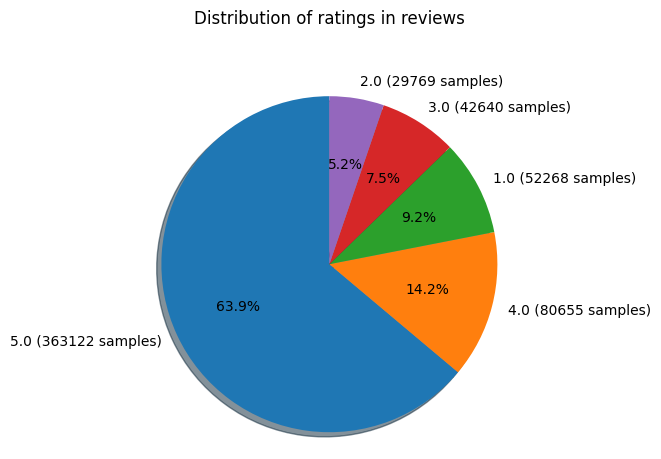

In [15]:
labels = [f'{k} ({foods_df["review/score"].value_counts()[k]} samples)' for k in foods_df['review/score'].value_counts().keys()]
sizes = dict(foods_df['review/score'].value_counts()).values()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal') 
ax1.set_title("Distribution of ratings in reviews",pad=40)
plt.show();

We can see a lot of positive reviews and a very little neutral reviews
1. positive reviews: 78% (approximately)
2. Negative reviews: 14% (approximately)
3. Neutral reviews: 8% (approximately)

In [16]:
# # checking for duplicate reviews
# duplicate_reviews = foods_df.duplicated(subset=["review/userId","review/time","review/text"], keep='first')
# count_duplicate_reviews = duplicate_reviews.value_counts()
# print("Total number of duplicate reviews are: ", count_duplicate_reviews.sum())

duplicate_reviews = foods_df.duplicated(subset=["review/userId","review/time","review/text"], keep='first')
count_duplicated_reviews = duplicate_reviews.value_counts()

sum_duplicate_reviews = count_duplicated_reviews[True].sum()
print("Total duplicate reviews: ", sum_duplicate_reviews)
print("Percentage of duplicate reviews: ", (sum_duplicate_reviews/count_duplicated_reviews.sum())*100)

Total duplicate reviews:  174731
Percentage of duplicate reviews:  30.73793130138938


In [17]:
# duplicate rows
foods_df[duplicate_reviews]

,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text,combined_text
29,B0001PB9FY,A3HDKO7OW0QNK4,canadian fan,1/1,5.0,1107820800,the best hot sauce in the world,i don't know if it's the cactus or the tequila...,I don't know if it's the cactus or the tequila...
574,B000G6RYNE,A3PJZ8TU8FDQ1K,jared castle,2/2,5.0,1231718400,"one bite and you'll become a ""chippoisseur""","i'm addicted to salty and tangy flavors, so wh...","I'm addicted to salty and tangy flavors, so wh..."
1973,B0017165OG,A2EPNS38TTLZYN,tedebear,0/0,3.0,1312675200,pok chops,the pork chops from omaha steaks were very tas...,The pork chops from Omaha Steaks were very tas...
2309,B0001VWE0M,AQM74O8Z4FMS0,sunshine,0/0,2.0,1127606400,below standard,too much of the white pith on this orange peel...,Too much of the white pith on this orange peel...
2323,B0001VWE0C,AQM74O8Z4FMS0,sunshine,0/0,2.0,1127606400,below standard,too much of the white pith on this orange peel...,Too much of the white pith on this orange peel...
...,...,...,...,...,...,...,...,...,...
568409,B0018CLWM4,A2PE0AGWV6OPL7,dark water mermaid,3/3,5.0,1309651200,quality & affordable food,i was very pleased with the ingredient quality...,I was very pleased with the ingredient quality...
568410,B0018CLWM4,A88HLWDCU57WG,r28,2/2,5.0,1332979200,litter box,my main reason for the five star review has to...,My main reason for the five star review has to...
568411,B0018CLWM4,AUX1HSY8FX55S,daw,1/1,5.0,1319500800,happy camper,i bought this to try on two registered maine c...,I bought this to try on two registered Maine C...
568412,B0018CLWM4,AVZ2OZ479Q9E8,ai ling chow,0/0,5.0,1336435200,two siberians like it!,when we brought home two 3-month-old purebred ...,When we brought home two 3-month-old purebred ...


We can see that almost 30 % of the data is just duplicate reviews

In [18]:
# deleting the data rows with duplicate data
foods_df = foods_df[~duplicate_reviews]
foods_df

,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text,combined_text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5.0,1303862400,good quality dog food,i have bought several of the vitality canned d...,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0/0,1.0,1346976000,not as advertised,product arrived labeled as jumbo salted peanut...,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"natalia corres ""natalia corres""",1/1,4.0,1219017600,"""delight"" says it all",this is a confection that has been around a fe...,This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,karl,3/3,2.0,1307923200,cough medicine,if you are looking for the secret ingredient i...,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"michael d. bigham ""m. wassir""",0/0,5.0,1350777600,great taffy,great taffy at a great price. there was a wid...,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...
568449,B001EO7N10,A28KG5XORO54AY,lettie d. carter,0/0,5.0,1299628800,will not do without,great for sesame chicken..this is a good if no...,Great for sesame chicken..this is a good if no...
568450,B003S1WTCU,A3I8AFVPEE8KI5,r. sawyer,0/0,2.0,1331251200,disappointed,i'm disappointed with the flavor. the chocolat...,I'm disappointed with the flavor. The chocolat...
568451,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2/2,5.0,1329782400,perfect for our maltipoo,"these stars are small, so you can give 10-15 o...","These stars are small, so you can give 10-15 o..."
568452,B004I613EE,A3IBEVCTXKNOH,"kathy a. welch ""katwel""",1/1,5.0,1331596800,favorite training and reward treat,these are the best treats for training and rew...,These are the BEST treats for training and rew...


Now since we want to classify if a data is positive or negative we have to decide which scores are positive and negative.
considerations:
1. score = 4, 5 as positive
2. score = 1, 2 as negative
3. score = 3 as neutral
So, we can remove the data with score = 3 to make the data even cleaner

In [19]:
# converting score into float
foods_df['review/score'] = foods_df['review/score'].astype(float)

C:\Users\sweta\AppData\Local\Temp\ipykernel_29248\3473285751.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foods_df['review/score'] = foods_df['review/score'].astype(float)


In [20]:
foods_df = foods_df[foods_df['review/score'] != 3]
foods_df

,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text,combined_text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5.0,1303862400,good quality dog food,i have bought several of the vitality canned d...,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0/0,1.0,1346976000,not as advertised,product arrived labeled as jumbo salted peanut...,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"natalia corres ""natalia corres""",1/1,4.0,1219017600,"""delight"" says it all",this is a confection that has been around a fe...,This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,karl,3/3,2.0,1307923200,cough medicine,if you are looking for the secret ingredient i...,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"michael d. bigham ""m. wassir""",0/0,5.0,1350777600,great taffy,great taffy at a great price. there was a wid...,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...
568449,B001EO7N10,A28KG5XORO54AY,lettie d. carter,0/0,5.0,1299628800,will not do without,great for sesame chicken..this is a good if no...,Great for sesame chicken..this is a good if no...
568450,B003S1WTCU,A3I8AFVPEE8KI5,r. sawyer,0/0,2.0,1331251200,disappointed,i'm disappointed with the flavor. the chocolat...,I'm disappointed with the flavor. The chocolat...
568451,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2/2,5.0,1329782400,perfect for our maltipoo,"these stars are small, so you can give 10-15 o...","These stars are small, so you can give 10-15 o..."
568452,B004I613EE,A3IBEVCTXKNOH,"kathy a. welch ""katwel""",1/1,5.0,1331596800,favorite training and reward treat,these are the best treats for training and rew...,These are the BEST treats for training and rew...


In [21]:
# Assigning review type based on score
foods_df.loc[foods_df["review/score"] > 3, 'review/type'] = 'Positive'
foods_df.loc[foods_df["review/score"] < 3, 'review/type'] = 'Negative'
foods_df

C:\Users\sweta\AppData\Local\Temp\ipykernel_29248\4275542050.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foods_df.loc[foods_df["review/score"] > 3, 'review/type'] = 'Positive'


,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text,combined_text,review/type
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5.0,1303862400,good quality dog food,i have bought several of the vitality canned d...,I have bought several of the Vitality canned d...,Positive
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0/0,1.0,1346976000,not as advertised,product arrived labeled as jumbo salted peanut...,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,B000LQOCH0,ABXLMWJIXXAIN,"natalia corres ""natalia corres""",1/1,4.0,1219017600,"""delight"" says it all",this is a confection that has been around a fe...,This is a confection that has been around a fe...,Positive
3,B000UA0QIQ,A395BORC6FGVXV,karl,3/3,2.0,1307923200,cough medicine,if you are looking for the secret ingredient i...,If you are looking for the secret ingredient i...,Negative
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"michael d. bigham ""m. wassir""",0/0,5.0,1350777600,great taffy,great taffy at a great price. there was a wid...,Great taffy at a great price. There was a wid...,Positive
...,...,...,...,...,...,...,...,...,...,...
568449,B001EO7N10,A28KG5XORO54AY,lettie d. carter,0/0,5.0,1299628800,will not do without,great for sesame chicken..this is a good if no...,Great for sesame chicken..this is a good if no...,Positive
568450,B003S1WTCU,A3I8AFVPEE8KI5,r. sawyer,0/0,2.0,1331251200,disappointed,i'm disappointed with the flavor. the chocolat...,I'm disappointed with the flavor. The chocolat...,Negative
568451,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2/2,5.0,1329782400,perfect for our maltipoo,"these stars are small, so you can give 10-15 o...","These stars are small, so you can give 10-15 o...",Positive
568452,B004I613EE,A3IBEVCTXKNOH,"kathy a. welch ""katwel""",1/1,5.0,1331596800,favorite training and reward treat,these are the best treats for training and rew...,These are the BEST treats for training and rew...,Positive


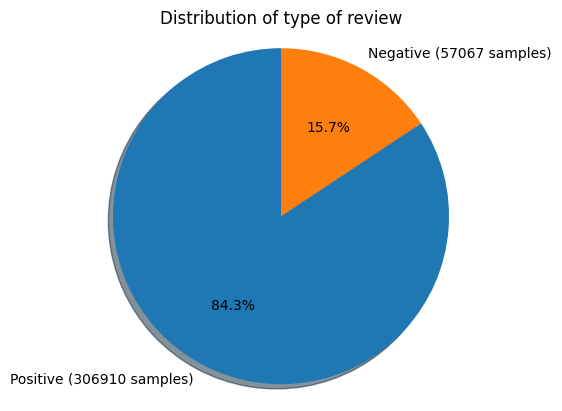

In [22]:
# counting the total positive and negative reviews
labels = [f'{k} ({foods_df["review/type"].value_counts()[k]} samples)' for k in foods_df['review/type'].value_counts().keys()]
sizes = dict(foods_df['review/type'].value_counts()).values()

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal') 
ax1.set_title("Distribution of type of review")
plt.show();

There are 128143479 words in the combination of all review.


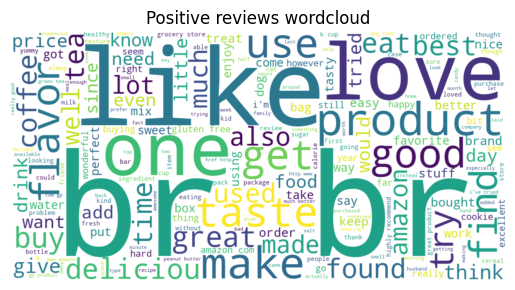

In [23]:
positive_review = foods_df[foods_df["review/type"] == "Positive"]
text = " ".join(review for review in positive_review['review/summary'] + positive_review['review/text'])
print ("There are {} words in the combination of all review.".format(len(text)))

# Create stopword list:
default_stopwords=set(stopwords.words('english'))

# Generate a word cloud image
wordcloud = WordCloud(stopwords=default_stopwords, background_color="white", width=1200, height=600).generate(text)

# Display the generated image:
plt.figure()
plt.title('Positive reviews wordcloud')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

The words like like, delicious, great, good, best have appeared very frequently

There are 26243818 words in the combination of all review.


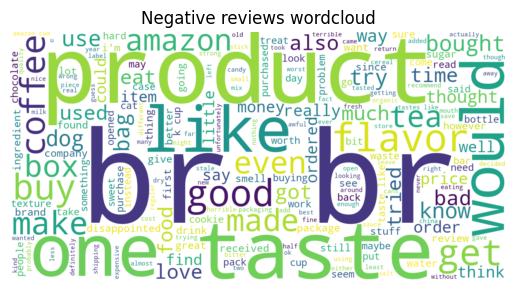

In [24]:
negative_review = foods_df[foods_df["review/type"] == "Negative"]
text = " ".join(review for review in negative_review['review/summary'] + negative_review['review/text'])
print ("There are {} words in the combination of all review.".format(len(text)))

# Create stopword list:
default_stopwords=set(stopwords.words('english'))

# Generate a word cloud image
wordcloud = WordCloud(stopwords=default_stopwords, background_color="white", width=1200, height=600).generate(text)

# Display the generated image:
plt.figure()
plt.title('Negative reviews wordcloud')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Words like bad, don't like can be seen

In [25]:
# removing words with repeated alphabets
def remove_words_with_repeated_characters(sentence): 
    pattern = re.compile("\\s*\\b(?=\\w*(\\w)\\1{2,})\\w*\\b")
    clean_text  = re.sub(pattern,' ',sentence)
    return (clean_text)


# apply the function:
foods_df['review/summary'] = foods_df['review/summary'].apply(remove_words_with_repeated_characters)
foods_df['review/text'] = foods_df['review/text'].apply(remove_words_with_repeated_characters)
foods_df.head()

C:\Users\sweta\AppData\Local\Temp\ipykernel_29248\2359774846.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foods_df['review/summary'] = foods_df['review/summary'].apply(remove_words_with_repeated_characters)
C:\Users\sweta\AppData\Local\Temp\ipykernel_29248\2359774846.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foods_df['review/text'] = foods_df['review/text'].apply(remove_words_with_repeated_characters)


,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text,combined_text,review/type
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5.0,1303862400,good quality dog food,i have bought several of the vitality canned d...,I have bought several of the Vitality canned d...,Positive
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0/0,1.0,1346976000,not as advertised,product arrived labeled as jumbo salted peanut...,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,B000LQOCH0,ABXLMWJIXXAIN,"natalia corres ""natalia corres""",1/1,4.0,1219017600,"""delight"" says it all",this is a confection that has been around a fe...,This is a confection that has been around a fe...,Positive
3,B000UA0QIQ,A395BORC6FGVXV,karl,3/3,2.0,1307923200,cough medicine,if you are looking for the secret ingredient i...,If you are looking for the secret ingredient i...,Negative
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"michael d. bigham ""m. wassir""",0/0,5.0,1350777600,great taffy,great taffy at a great price. there was a wid...,Great taffy at a great price. There was a wid...,Positive


In [26]:
# create function for punctuation and special characters removal:
def remove_special_chars_punctuations(sentence):
    # match a single character not present in the set (basically anything other than a-z and A-Z)
    pattern = re.compile("[^a-zA-Z]+") 
    clean_text  = re.sub(pattern,' ',sentence).strip()
    return clean_text

# apply the function:
foods_df['review/summary'] = foods_df['review/summary'].apply(remove_special_chars_punctuations)
foods_df['review/text'] = foods_df['review/text'].apply(remove_special_chars_punctuations)
foods_df.head()

C:\Users\sweta\AppData\Local\Temp\ipykernel_29248\619541676.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foods_df['review/summary'] = foods_df['review/summary'].apply(remove_special_chars_punctuations)
C:\Users\sweta\AppData\Local\Temp\ipykernel_29248\619541676.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foods_df['review/text'] = foods_df['review/text'].apply(remove_special_chars_punctuations)


,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text,combined_text,review/type
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5.0,1303862400,good quality dog food,i have bought several of the vitality canned d...,I have bought several of the Vitality canned d...,Positive
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0/0,1.0,1346976000,not as advertised,product arrived labeled as jumbo salted peanut...,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,B000LQOCH0,ABXLMWJIXXAIN,"natalia corres ""natalia corres""",1/1,4.0,1219017600,delight says it all,this is a confection that has been around a fe...,This is a confection that has been around a fe...,Positive
3,B000UA0QIQ,A395BORC6FGVXV,karl,3/3,2.0,1307923200,cough medicine,if you are looking for the secret ingredient i...,If you are looking for the secret ingredient i...,Negative
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"michael d. bigham ""m. wassir""",0/0,5.0,1350777600,great taffy,great taffy at a great price there was a wide ...,Great taffy at a great price. There was a wid...,Positive


In [27]:
# cleaning the stop words
stop_words = stopwords.words('english')
foods_df['review/text'] = foods_df['review/text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
foods_df['review/summary'] = foods_df['review/summary'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
foods_df

C:\Users\sweta\AppData\Local\Temp\ipykernel_29248\3866303814.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foods_df['review/text'] = foods_df['review/text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
C:\Users\sweta\AppData\Local\Temp\ipykernel_29248\3866303814.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foods_df['review/summary'] = foods_df['review/summary'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text,combined_text,review/type
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5.0,1303862400,good quality dog food,bought several vitality canned dog food produc...,I have bought several of the Vitality canned d...,Positive
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0/0,1.0,1346976000,advertised,product arrived labeled jumbo salted peanuts p...,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,B000LQOCH0,ABXLMWJIXXAIN,"natalia corres ""natalia corres""",1/1,4.0,1219017600,delight says,confection around centuries light pillowy citr...,This is a confection that has been around a fe...,Positive
3,B000UA0QIQ,A395BORC6FGVXV,karl,3/3,2.0,1307923200,cough medicine,looking secret ingredient robitussin believe f...,If you are looking for the secret ingredient i...,Negative
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"michael d. bigham ""m. wassir""",0/0,5.0,1350777600,great taffy,great taffy great price wide assortment yummy ...,Great taffy at a great price. There was a wid...,Positive
...,...,...,...,...,...,...,...,...,...,...
568449,B001EO7N10,A28KG5XORO54AY,lettie d. carter,0/0,5.0,1299628800,without,great sesame chicken good better resturants ea...,Great for sesame chicken..this is a good if no...,Positive
568450,B003S1WTCU,A3I8AFVPEE8KI5,r. sawyer,0/0,2.0,1331251200,disappointed,disappointed flavor chocolate notes especially...,I'm disappointed with the flavor. The chocolat...,Negative
568451,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2/2,5.0,1329782400,perfect maltipoo,stars small give one training session tried tr...,"These stars are small, so you can give 10-15 o...",Positive
568452,B004I613EE,A3IBEVCTXKNOH,"kathy a. welch ""katwel""",1/1,5.0,1331596800,favorite training reward treat,best treats training rewarding dog good groomi...,These are the BEST treats for training and rew...,Positive


In [28]:
# tokenize data
foods_df['tokenized_text'] = foods_df['review/text'].apply(word_tokenize)
foods_df['tokenized_summary'] = foods_df['review/summary'].apply(word_tokenize)
foods_df

C:\Users\sweta\AppData\Local\Temp\ipykernel_29248\581778996.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foods_df['tokenized_text'] = foods_df['review/text'].apply(word_tokenize)
C:\Users\sweta\AppData\Local\Temp\ipykernel_29248\581778996.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foods_df['tokenized_summary'] = foods_df['review/summary'].apply(word_tokenize)


,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text,combined_text,review/type,tokenized_text,tokenized_summary
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5.0,1303862400,good quality dog food,bought several vitality canned dog food produc...,I have bought several of the Vitality canned d...,Positive,"[bought, several, vitality, canned, dog, food,...","[good, quality, dog, food]"
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0/0,1.0,1346976000,advertised,product arrived labeled jumbo salted peanuts p...,Product arrived labeled as Jumbo Salted Peanut...,Negative,"[product, arrived, labeled, jumbo, salted, pea...",[advertised]
2,B000LQOCH0,ABXLMWJIXXAIN,"natalia corres ""natalia corres""",1/1,4.0,1219017600,delight says,confection around centuries light pillowy citr...,This is a confection that has been around a fe...,Positive,"[confection, around, centuries, light, pillowy...","[delight, says]"
3,B000UA0QIQ,A395BORC6FGVXV,karl,3/3,2.0,1307923200,cough medicine,looking secret ingredient robitussin believe f...,If you are looking for the secret ingredient i...,Negative,"[looking, secret, ingredient, robitussin, beli...","[cough, medicine]"
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"michael d. bigham ""m. wassir""",0/0,5.0,1350777600,great taffy,great taffy great price wide assortment yummy ...,Great taffy at a great price. There was a wid...,Positive,"[great, taffy, great, price, wide, assortment,...","[great, taffy]"
...,...,...,...,...,...,...,...,...,...,...,...,...
568449,B001EO7N10,A28KG5XORO54AY,lettie d. carter,0/0,5.0,1299628800,without,great sesame chicken good better resturants ea...,Great for sesame chicken..this is a good if no...,Positive,"[great, sesame, chicken, good, better, restura...",[without]
568450,B003S1WTCU,A3I8AFVPEE8KI5,r. sawyer,0/0,2.0,1331251200,disappointed,disappointed flavor chocolate notes especially...,I'm disappointed with the flavor. The chocolat...,Negative,"[disappointed, flavor, chocolate, notes, espec...",[disappointed]
568451,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2/2,5.0,1329782400,perfect maltipoo,stars small give one training session tried tr...,"These stars are small, so you can give 10-15 o...",Positive,"[stars, small, give, one, training, session, t...","[perfect, maltipoo]"
568452,B004I613EE,A3IBEVCTXKNOH,"kathy a. welch ""katwel""",1/1,5.0,1331596800,favorite training reward treat,best treats training rewarding dog good groomi...,These are the BEST treats for training and rew...,Positive,"[best, treats, training, rewarding, dog, good,...","[favorite, training, reward, treat]"


In [29]:
# combining the text columns usesd to classify
foods_df['combined_text'] = foods_df['review/summary'] + ' ' + foods_df['review/text'] 
foods_df.head()

C:\Users\sweta\AppData\Local\Temp\ipykernel_29248\4142602484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  foods_df['combined_text'] = foods_df['review/summary'] + ' ' + foods_df['review/text']


,product/productId,review/userId,review/profileName,review/helpfulness,review/score,review/time,review/summary,review/text,combined_text,review/type,tokenized_text,tokenized_summary
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1/1,5.0,1303862400,good quality dog food,bought several vitality canned dog food produc...,good quality dog food bought several vitality ...,Positive,"[bought, several, vitality, canned, dog, food,...","[good, quality, dog, food]"
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0/0,1.0,1346976000,advertised,product arrived labeled jumbo salted peanuts p...,advertised product arrived labeled jumbo salte...,Negative,"[product, arrived, labeled, jumbo, salted, pea...",[advertised]
2,B000LQOCH0,ABXLMWJIXXAIN,"natalia corres ""natalia corres""",1/1,4.0,1219017600,delight says,confection around centuries light pillowy citr...,delight says confection around centuries light...,Positive,"[confection, around, centuries, light, pillowy...","[delight, says]"
3,B000UA0QIQ,A395BORC6FGVXV,karl,3/3,2.0,1307923200,cough medicine,looking secret ingredient robitussin believe f...,cough medicine looking secret ingredient robit...,Negative,"[looking, secret, ingredient, robitussin, beli...","[cough, medicine]"
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"michael d. bigham ""m. wassir""",0/0,5.0,1350777600,great taffy,great taffy great price wide assortment yummy ...,great taffy great taffy great price wide assor...,Positive,"[great, taffy, great, price, wide, assortment,...","[great, taffy]"


In [30]:
# Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(foods_df['combined_text'], foods_df['review/score'], test_size=0.2, random_state=42)

In [31]:
# Vectorizing the text
# Bags of words
vectorizer = CountVectorizer()

X_train_text = vectorizer.fit_transform(X_train)
X_test_text = vectorizer.transform(X_test)

In [32]:
# creating a naive bayes classifier
classifier = MultinomialNB(force_alpha=True)

# fit the data to the classifier
classifier.fit(X_train_text, y_train)

MultinomialNB(force_alpha=True)

In [33]:
# Evaluate the model
y_prediction = classifier.predict(X_test_text)

# check the accuracy
accuracy = accuracy_score(y_test, y_prediction)
print("Accuracy", accuracy)

Accuracy 0.75065937688884


Using an SVM classifier

In [34]:
# # Train an SVM Classifier
# from sklearn.svm import SVC

# classifier = SVC(kernel='linear')  # You can choose different kernels based on your data
# classifier.fit(X_train_text, y_train)

In [35]:
# # Evaluate the Model
# y_pred = classifier.predict(X_test_text)

# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy}')
# print(classification_report(y_test, y_pred))

In [36]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer()
# X_train_tfidf = vectorizer.fit_transform(X_train)
# X_test_tfidf = vectorizer.transform(X_test)

# # Train an SVM Classifier
# classifier = SVC(kernel='linear')  # You can experiment with different kernel choices
# classifier.fit(X_train_tfidf, y_train)

# # Evaluate the Model
# y_pred = classifier.predict(X_test_tfidf)

# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy}')
# print(classification_report(y_test, y_pred))

In [37]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(max_iter=1000, random_state=42)
classifier.fit(X_train_text, y_train)

y_pred = classifier.predict(X_test_text)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
# print(classification_report(y_test, y_pred))

Accuracy: 0.7753860102203418


c:\users\sweta\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
